# Finite Hypothesis Classes

In this homework, you will explore how to implement and use finite hypothesis classes.
You will use the famous MNIST dataset for handwritten digit recognition.

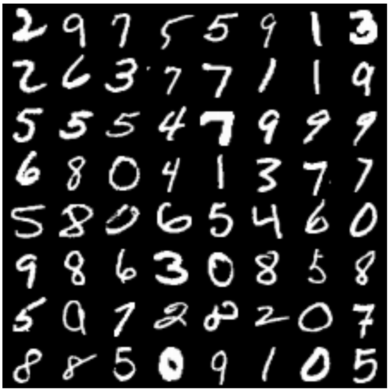

With the simple finite hypothesis classes we've studied so far, you should be able to get about 90% accuracy on this problem.
By the end of the semester, you'll be able to get state-of-the-art (SOTA) accuracy of >99%.

**Instructions:**
You should read through the code starting with Part 1 below.
The comments contain detailed descriptions of what the code is doing.
There are three FIXME annotations in the comments (in parts 1, 3, and 4).
You should complete the tasks specified by those FIXME annotations by modifying the jupyter notebook directly.
Once you've completed all the tasks,
create a new github repo and upload this notebook to github.
Submit the assignment by copying the link to your repo in sakai.

## Part 0: Background

This section contains imports and helper functions used by the code in parts 1+.
It is safe to skip reading the code in this section for now,
but you will likely have to refer to it later to see how to use the helper functions.

In [72]:
import math
import sklearn
import sklearn.metrics
import time

# make numpy random numbers deterministic
import numpy as np
np.random.seed(0)

# enable plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
def sign(a):
    '''
    Convert a boolean value into +/- 1.

    >>> sign(12.5)
    1
    >>> sign(-12.5)
    -1
    '''
    if a > 0:
        return 1
    if a <= 0:
        return -1


def set_exp(xs, p):
    '''
    Compute the "set exponential" function.

    For efficiency, this function is a generator.
    This means that large sets will never be explicitly stored,
    and this function will always use O(1) memory.

    The doctests below first convert the generator into a list for visualization.

    >>> list(set_exp([-1, +1], 0))
    []
    >>> list(set_exp([-1, +1], 1))
    [[-1], [1]]
    >>> list(set_exp([-1, +1], 2))
    [[-1, -1], [1, -1], [-1, 1], [1, 1]]
    >>> list(set_exp([-1, +1], 3))
    [[-1, -1, -1], [1, -1, -1], [-1, 1, -1], [1, 1, -1], [-1, -1, 1], [1, -1, 1], [-1, 1, 1], [1, 1, 1]]

    Observe that the length grows exponentially with the power.

    >>> len(list(set_exp([-1, +1], 4)))
    16
    >>> len(list(set_exp([-1, +1], 5)))
    32
    >>> len(list(set_exp([-1, +1], 6)))
    64
    >>> len(list(set_exp([-1, +1], 7)))
    128
    >>> len(list(set_exp([-1, +1], 8)))
    256
    '''
    assert(len(xs) > 0)
    assert(p >= 0)
    assert(type(p) == int)
    if p == 1:
        for x in xs:
            yield [x]
    elif p > 1:
        for x in xs:
            for ys in set_exp(xs, p - 1):
                yield ys + [x]

## Part 1: Hypothesis Classes

This section explores how to translate the mathematical definitions of the finite hypothesis classes into python code.

In [74]:
# The H_binary hypothesis class is easy to represent in code as a list of anonymous functions
H_binary = [lambda x: 1, lambda x: -1]

# The code below shows how to use one of these functions.
# First we define an example datapoint.
# Then we apply every hypothesis h in the hypothesis class to the sample.
x = np.array([12.5, -12.5])
for h in H_binary:
    ypred = h(x)
    print(f'ypred={ypred}')

# You should ensure that you understand the output of this code.

ypred=1
ypred=-1


In [75]:
# H_axis is harder to represent in code;
# the "obvious" thing to do is something like the following two lines of code
d = 2
H_axis = [lambda x: sign(x[i]) for i in range(d)]

# unfortunately, there is a serious bug in this code
# to illustrate the bug, let's try applying every hypothesis to the same data point as above
x = np.array([12.5, -12.5])
for h in H_axis:
    ypred = h(x)
    print(f'ypred={ypred}')

# Notice that the output is the same for both functions,
# but the output *should* be different.
# That's because on this particular dataset, sign(x[0]) should be +1 and sign(x[1]) should be -1.
# the problem is that we're getting -1 twice

ypred=-1
ypred=-1


In [76]:
# the problem observed above is related to something called a closure in python
# closures are a fundamental part of modern programming,
# and it is extremely important that you understand how they work.
# it is common in technical interviews for SWE positions to be asked syntax-related questions about closures

# for the specific case of using a lambda inside of a list comprehension,
# you can find a detailed explanation of what is happening on stackoverflow at
# <https://stackoverflow.com/questions/28268439/python-list-comprehension-with-lambdas>

# to fix our problem, we can use a default argument to change the scope of the variable i
# in general, when translating set builder notation into python,
# it is necessary to do this step for all variables that you are "looping over"
H_axis = [lambda x, i=i: sign(x[i]) for i in range(d)]

# now observe that we get the correct output
x = np.array([12.5, -12.5])
for h in H_axis:
    ypred = h(x)
    print(f'ypred={ypred}')

ypred=1
ypred=-1


In [77]:
# there's one last minor problem with our definitions of the H_binary and H_axis hypothesis classes above:
# we've hard-coded the number of dimensions.
# we can make our hypothesis classes more generic by wrapping them in another lambda to specify the dimension

H_binary = lambda d: [lambda x: 1, lambda x: -1]
H_axis = lambda d: [lambda x, i=i: sign(x[i]) for i in range(d)]

# now to use the class, we need to specify the number of dimensions;
# here's an example in 4 dimensions
x = np.array([12.5, -12.5, 1.2, -1.2])
print('H_binary')
for h in H_binary(4):
    ypred = h(x)
    print(f'ypred={ypred}')

print('H_axis')
for h in H_axis(4):
    ypred = h(x)
    print(f'ypred={ypred}')

H_binary
ypred=1
ypred=-1
H_axis
ypred=1
ypred=-1
ypred=1
ypred=-1


In [78]:
# notice that the size of H_binary doesn't change based on the number of dimensions,
# but that the size of H_axis does
print(len(H_binary(4)))
print(len(H_axis(4)))

2
4


In [93]:
H_binary = lambda d: [lambda x: +1, lambda x: -1]
H_axis = lambda d: [lambda x, i=i: sign(x[i]) for i in range(d)]
H_axis2 = lambda d: [lambda x, i=i: sigma * sign(x[i]) for i in range(d) for sigma in [-1, 1]]
H_multiaxis2 = lambda d: [lambda x, sigma=sigma: sign(sum(sigma[i] * sign(x[i]) for i in range(d))) for sigma in set_exp([-1, +1], d)]
H_multiaxis3 = lambda d: [lambda x, sigma=sigma: sign(sum(sigma[i] * sign(x[i]) for i in range(d))) for sigma in set_exp([-1, 0, +1], d)]

# the following code prints a nice table showing the size of the finite hypothesis classes in different dimensions
# you will know your implementations above are correct if the sizes match the formulas we derived in the notes
print(f'  d {"len(H_binary(d))":>20}{"len(H_axis(d))":>20}{"len(H_axis2(d))":>20}{"len(H_multiaxis2(d))":>25}{"len(H_multiaxis3(d))":>25}')
for d in range(1, 11):
    print(f' {d:2} {len(H_binary(d)):20d}{len(H_axis(d)):20d}{len(H_axis2(d)):20d}{len(H_multiaxis2(d)):25d}{len(H_multiaxis3(d)):25d}')

  d     len(H_binary(d))      len(H_axis(d))     len(H_axis2(d))     len(H_multiaxis2(d))     len(H_multiaxis3(d))
  1                    2                   1                   2                        2                        3
  2                    2                   2                   4                        4                        9
  3                    2                   3                   6                        8                       27
  4                    2                   4                   8                       16                       81
  5                    2                   5                  10                       32                      243
  6                    2                   6                  12                       64                      729
  7                    2                   7                  14                      128                     2187
  8                    2                   8                  16                

## Part 2: Loading the MNIST Data

This section loads the dataset.
There are no FIXME annotations in this section.
It would still be useful to skim this section, however, because the subsequent sections rely on the dataset.

In [80]:
# scikit learn has built-in functions for loading lots of standard datasets
# the MNIST dataset is small by machine learning standards,
# but it still takes 10-20 seconds to load on my machine
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

# the standard MNIST problem has 10 classes, one for each numeric digit
# we've only studied binary classification in class so far,
# so we'll convert MNIST into a binary problem
# the idea is that we will label all "1"s as +1, all "2"s as -1, and delete all othe other digits
label_positive = '1'
label_negative = '2'
dataset_mask = np.logical_or(y == label_positive, y == label_negative)
X = X[dataset_mask]
y = y[dataset_mask]
y[y == label_positive] = +1
y[y == label_negative] = -1
y = y.astype(np.int64)

# for debugging purposes, I always print the shape of my important tensors
print(f"X.shape={X.shape}") # shape = N x d
print(f"y.shape={y.shape}") # shape = N

X.shape=(14867, 784)
y.shape=(14867,)


i=0, y[i]=1, x[i]=


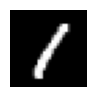

i=1, y[i]=-1, x[i]=


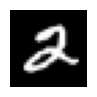

i=2, y[i]=1, x[i]=


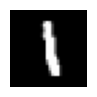

i=3, y[i]=1, x[i]=


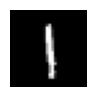

i=4, y[i]=1, x[i]=


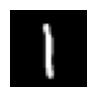

In [81]:
# it's always a good idea to visualize your datapoints after loading them
# this lets us sanity check that our labels are in fact correct
for i in range(5):
    print(f"i={i}, y[i]={y[i]}, x[i]=")
    image = X[i].reshape([28,28])
    fig = plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()

In [82]:
# we now split the dataset into a training a testing datasets
# we will use a relatively small N value (just to make your future experiments faster)
# we also have a large Ntest value, so we can be fairly confident that |Etest - Eout| is small
N = 1000
Ntest = 10000
Xtrain = X[:N]
ytrain = y[:N]
Xtest = X[N:N+Ntest]
ytest = y[N:N+Ntest]
print(f"Xtrain.shape={Xtrain.shape}")
print(f"ytrain.shape={ytrain.shape}")
print(f"Xtest.shape={Xtest.shape}")
print(f"ytest.shape={ytest.shape}")

Xtrain.shape=(1000, 784)
ytrain.shape=(1000,)
Xtest.shape=(10000, 784)
ytest.shape=(10000,)


## Part 3: Model Training

This section introduces how to implmement and use scikit learn models.
In general, you won't have to implement the more "interesting" models because they are already implemented.
But you will have to implement the TEA model.
The main purpose of this task is to just get you familiar with how scikit learn is structured so that you will be able to effectively use it later on.

In [83]:
# in scikit learn, all learning models are implemented as a class
# these classes are called "estimators",
# and they follow the interface specified in <https://scikit-learn.org/dev/developers/develop.html>
# in particular, all estimators will need at least three methods:
# (1) __init__ specifies the hyperparameters to the model
# (2) fit takes the training dataset as input and computes the hypothesis in the hypothesis class
# (3) predict applies the hypothesis to an input datapoint or dataset

class TEA:
    def __init__(self, H):
        self.H = H
        self.g = None

    def fit(self, X, Y):
        d = X.shape[1]
        min_error = np.inf

        hypotheses = self.H(d)  # Generate all possible hypotheses for the problem size

        # Iterate over all hypotheses in the hypothesis class
        for h in hypotheses:
            # Predict the training data using the current hypothesis
            Y_pred = np.apply_along_axis(h, 1, X)

            # Compute the training error (1 - accuracy)
            error = 1 - sklearn.metrics.accuracy_score(Y, Y_pred)

            # If this hypothesis has lower error than the current best, update it
            if error < min_error:
                min_error = error
                self.g = h  # Store the best hypothesis found so far


    def predict(self, X):
        assert(self.g is not None)
        if len(X.shape) == 1:
            return self.g(X)
        else:
            return np.apply_along_axis(self.g, 1, X)

# we now train the model by passing the training data to the .fit method
model = TEA(H_axis2) # replace H_axis with other hypothesis classes
time_start = time.time()
model.fit(Xtrain, ytrain)
time_end = time.time()
runtime = time_end - time_start
print(f"runtime={runtime:0.1f} seconds")

# report the relavent metrics
# scikit learn does not have an error metric built in,
# but we can compute it as 1 - accuracy
ytrain_pred = model.predict(Xtrain)
Ein = 1 - sklearn.metrics.accuracy_score(ytrain_pred, ytrain)
print(f"Ein={Ein:0.4f}")
ytest_pred = model.predict(Xtest)
Etest = 1 - sklearn.metrics.accuracy_score(ytest, ytest_pred)
print(f"Etest={Etest:0.4f}")
print(f'generalization error={abs(Etest - Ein):0.4f}')

runtime=14.9 seconds
Ein=0.1540
Etest=0.1504
generalization error=0.0036


## Part 4: Data preprocessing with random projections

In [94]:
# recall that one of the most important parts of this class is learning how to effectively preprocess data
# in the real world, you will never have to implement your own machine learning algorithms
# existing implementations in libraries like scikit learn are highly optimized,
# and there's no need to reinvent the wheel.
# but you will have to preprocess data

# one of the most important forms of preprocessing is the random projection
# recall that projecting the data onto a smaller dimension (dprime) will cause:
# (1) the runtime for TEA to go down,
# (2) the generalization error |Ein - Eout| to go down,
# (3) the training error Ein to go up
# every application will have different demands on these quantities,
# and so you will have to choose an appropriate dimension dprime for your application

# to project the data, we need to generate a random d x dprime matrix
# we use two tricks to generate the random matrix deterministically:
# first, we set the seed; this ensures that every run of this cell will create the same matrix
# (although the same seed will result in different matrices on different computers)
# second, we create a full matrix and then slice it to the appropriate size
# this ensures that the value of dprime does not affect the contents of A
np.random.seed(0)
d = X.shape[1]
Afull = np.random.uniform(low=-1, high=1, size=(d, d))
print(f'Afull.shape={Afull.shape}') # shape = d x d

Afull.shape=(784, 784)


Xprime.shape=(14867, 5)
i=0, y[i]=1, x[i]=


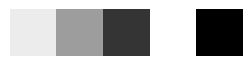

i=1, y[i]=-1, x[i]=


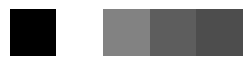

i=2, y[i]=1, x[i]=


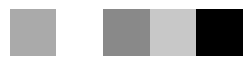

i=3, y[i]=1, x[i]=


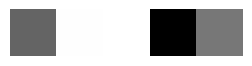

i=4, y[i]=1, x[i]=


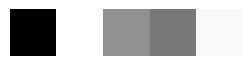

In [95]:
# the code below plots the data points after they have been projected down into a very small dprime
dprime = 5
A = Afull[:, :dprime]
Xprime = X @ A
print(f"Xprime.shape={Xprime.shape}")
for i in range(5):
    print(f"i={i}, y[i]={y[i]}, x[i]=")
    image = Xprime[i].reshape([1, dprime])
    fig = plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()

In [96]:
# the images above are no longer human interpretable;
# remarkably, we can still learn an effective hypothesis on these newly transformed data points
# with dprime=5, my results on H_axis2 are nearly as good as they were for the full dataset
# on this smaller dataset size, we can actually now try the H_multiaxis* hypothesis classes as well

# update: optimal hyperparameters
best_hypothesis = H_axis2
best_dprime = 13

hypothesis_classes = [H_binary, H_axis, H_axis2, H_multiaxis2, H_multiaxis3]
dprimes = [3, 5, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50]

Etest_table = [[" ", "H_binary", "H_axis", "H_axis2", "H_multiaxis2", "H_multiaxis3"]]

for dprime in dprimes:
    Etest_table.append([f"dprime={dprime}"])

    for H in hypothesis_classes:
        if dprime > 5 and (H == H_multiaxis2 or H == H_multiaxis3):
            continue

        A = Afull[:, :dprime]

        model = TEA(H)

        time_start = time.time()
        model.fit(Xtrain @ A, ytrain)
        time_end = time.time()
        runtime = time_end - time_start
        # print(f"runtime={runtime:0.1f} seconds")

        ytrain_pred = model.predict(Xtrain @ A)
        Ein = 1 - sklearn.metrics.accuracy_score(ytrain_pred, ytrain)
        # print(f"Ein={Ein:0.4f}")

        ytest_pred = model.predict(Xtest @ A)
        Etest = 1 - sklearn.metrics.accuracy_score(ytest, ytest_pred)
        # print(f"Etest={Etest:0.4f}")

        # print(f'generalization error={abs(Etest - Ein):0.4f}')
        Etest_table[-1].append(f"Etest={Etest:0.4f}")


for row in Etest_table:
    print(("{:<18} " * len(row)).format(*row))

                   H_binary           H_axis             H_axis2            H_multiaxis2       H_multiaxis3       
dprime=3           Etest=0.4665       Etest=0.5186       Etest=0.5186       Etest=0.2914       Etest=0.2363       
dprime=5           Etest=0.4665       Etest=0.5186       Etest=0.5186       Etest=0.2749       Etest=0.2323       
dprime=10          Etest=0.4665       Etest=0.3837       Etest=0.3837       
dprime=11          Etest=0.4665       Etest=0.3837       Etest=0.3837       
dprime=12          Etest=0.4665       Etest=0.3837       Etest=0.3837       
dprime=13          Etest=0.4665       Etest=0.1810       Etest=0.1810       
dprime=14          Etest=0.4665       Etest=0.1810       Etest=0.1810       
dprime=15          Etest=0.4665       Etest=0.1810       Etest=0.1810       
dprime=20          Etest=0.4665       Etest=0.1810       Etest=0.1810       
dprime=30          Etest=0.4665       Etest=0.1810       Etest=0.1810       
dprime=40          Etest=0.4665       E

In [87]:
# After reviewing the output, it seems like for the given dprimes, "H_axis2" consistently performs well at higher dprime values.
# Specifically, from dprime=13 and onward, "H_axis2" produces the lowest Etest values, which is the metric we want to minimize.
# Note that I excluded the H_multiaxis* classes after dprime = 5 because the runtime is too long.
# Also, there are other hyperparameter choices that would lead to the same Etest.

# Based on these observations, my chosen hyperparameters are:
# Hypothesis class: H_axis2
# dprime: 13
# This combination balances performance with a reasonable runtime while yielding minimal Etest values.

# The theory behind this choice: As dprime increases, more dimensions of the data are considered, and thus, the hypothesis class can capture more complexity.
# However, at a certain point, increasing dprime can lead to overfitting or unnecessary complexity. Based on the observed results, dprime=13 provides the best balance.
# "H_axis2" fits this problem well as it consistently improves performance while remaining efficient.